# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [3]:
A@e_1

array([1, 4, 7])

The first column is selected from A when right multiplied with e_1

In [4]:
A@e_2

array([2, 5, 8])

The second column is selected from A when right multiplied with e_2

In [5]:
A@e_3

array([3, 6, 9])

The third column is selected from A when right multiplied with e_3

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [6]:
u = np.ones(3)

In [7]:
A@u

array([ 6., 15., 24.])

The result is a vector with each entry being the sum of each row of A. Each entry of the product Au is a dot product of a row of 
A with the vector u.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [8]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [9]:
A@x

array([-2,  4, 11])

It returns x. An identity matrix times any vector results in the original vector. The ones on the diagonals in the identity matrix select each entry in x and zero out the rest. 

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [10]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [11]:
A@x

array([11, -2,  4])

The matrix A multiplied by x rearranges the entries of x. The third entry of x is moved to the first, the first is moved to the second, and the second is moved to the third.

In [12]:
A1 = np.array([ [0,1,0],
              [0,0,1],
              [1,0,0]])

In [13]:
A1@x

array([ 4, 11, -2])

With this matrix, A1, the second entry of x is moved to the first, the third is moved to the second, and the first is moved to the third.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [14]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [15]:
A@e_1

array([0.50052958, 0.02574731, 0.47372311])

This is the first column of A. It represents the states that started in state one and the proportion of states that either stayed in state one, moved to state two, or moved to state three.

In [16]:
A@e_2

array([0.24049286, 0.39251588, 0.36699127])

This is the second column of A. It represents the states that started in state two and the proportion of states that either stayed in state two, moved to state one, or moved to state three.

In [17]:
A@e_3

array([0.18358131, 0.37907577, 0.43734292])

This is the third column of A. It represents the states that started in state three and the proportion of states that either stayed in state three, moved to state two, or moved to state one.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [18]:
for i in range(5):
    e_1 = e_1@A
e_1

array([0.29266551, 0.29197422, 0.29171646])

In [19]:
for i in range(5):
    e_2 = e_2@A
e_2

array([0.27862515, 0.27979983, 0.2802254 ])

In [20]:
for i in range(5):
    e_3 = e_3@A
e_3

array([0.42870935, 0.42822595, 0.42805814])

The vectors approach a steady state where each state converges. The starting state no longer matters as the transition to any other state is equally likely. 

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [21]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [22]:
initial_state = np.array([1,0])
state_2= T@initial_state
state_2

array([0.25, 0.75])

This is the first column of the transition matrix T. This represents that 25% of states stay in state one and 75% of states move to state two given that we start in state one.

In [23]:
state_3 = T@state_2
state_3

array([0.4375, 0.5625])

This represents the forecast of the expected proportions of the population in each state after two time periods, starting entirely in state 1 at time 0 and evolving according to the transition rules in T. 

In [24]:
state = state_3
for i in range(10):
    state = T@state
    print(f'{i}: {state}')

0: [0.390625 0.609375]
1: [0.40234375 0.59765625]
2: [0.39941406 0.60058594]
3: [0.40014648 0.59985352]
4: [0.39996338 0.60003662]
5: [0.40000916 0.59999084]
6: [0.39999771 0.60000229]
7: [0.40000057 0.59999943]
8: [0.39999986 0.60000014]
9: [0.40000004 0.59999996]


After one or two more transitions, the probabilities begin to converge to 0.40 and 0.60.

In [25]:
initial_state = np.array([0,1])
state_2= T@initial_state
state_2

array([0.5, 0.5])

In [26]:
state_3 = T@state_2
state_3

array([0.375, 0.625])

In [27]:
state = state_3
for i in range(10):
    state = T@state
    print(f'{i}: {state}')

0: [0.40625 0.59375]
1: [0.3984375 0.6015625]
2: [0.40039062 0.59960938]
3: [0.39990234 0.60009766]
4: [0.40002441 0.59997559]
5: [0.3999939 0.6000061]
6: [0.40000153 0.59999847]
7: [0.39999962 0.60000038]
8: [0.4000001 0.5999999]
9: [0.39999998 0.60000002]


The first transitions are different as they are relying on the different initial state, but overtime they converge to the same proportions.

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [28]:
import pandas as pd
import numpy as np

In [29]:
weather = pd.read_csv('cville_weather.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB


In [30]:
weather['NAME'].value_counts()


NAME
CHARLOTTESVILLE 0.5 NNE, VA US    271
CHARLOTTESVILLE 8.4 W, VA US      140
Name: count, dtype: int64

There are two locations where the weather is being recorded. We can select one for the purpose of our analysis and drop all rows missing PRCP.

In [31]:
weather = weather[weather['NAME'] == 'CHARLOTTESVILLE 0.5 NNE, VA US']
weather = weather.dropna(subset=['PRCP'])
weather

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-18,NaN,NaN,NaN,NaN,0.04,",,N",NaN,NaN,NaN,NaN
267,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-21,NaN,NaN,NaN,NaN,0.38,",,N",NaN,NaN,NaN,NaN
268,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-25,NaN,NaN,NaN,NaN,0.29,",,N",NaN,NaN,NaN,NaN
269,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-27,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN


In [32]:
weather['rain'] = (weather['PRCP'] > 0).astype(int)
weather

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,rain
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN,1
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN,1
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN,1
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN,1
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-18,NaN,NaN,NaN,NaN,0.04,",,N",NaN,NaN,NaN,NaN,1
267,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-21,NaN,NaN,NaN,NaN,0.38,",,N",NaN,NaN,NaN,NaN,1
268,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-25,NaN,NaN,NaN,NaN,0.29,",,N",NaN,NaN,NaN,NaN,1
269,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2025-09-27,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN,1


In [33]:
seq = weather['rain'].tolist()
states = [0, 1]


## Create a S X S transition matrix, and find the transition counts:
S = len(states)
T = len(seq)
tr_counts = np.zeros( (S, S) )

for t in range(1,T): # For each transition
    # Current and next tokens:
    x_tm1 = seq[t-1] # previous state
    x_t = seq[t] # current state
    # Determine transition indices:
    index_from = states.index(x_tm1)
    index_to = states.index(x_t)
    # Update transition counts:
    tr_counts[index_to, index_from] += 1

print(f'\nTransition Counts:\n {tr_counts}')

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print(f'\nState Counts: \n {sums}')

# Sum the transition counts by row:
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                            out=np.zeros_like(tr_counts), 
                            where= sums!=0)

tr_pr_1 = tr_pr # Save transition matrix for later

print(f'\nTransition Proportions:')
pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)


Transition Counts:
 [[ 86.  37.]
 [ 37. 103.]]

State Counts: 
 [[123.]
 [140.]]

State proportions: 
 [[0.46768061]
 [0.53231939]]

Transition Proportions:


,0,1
0,0.70,0.30
1,0.26,0.74


In [34]:
initial_state = 1 # Choose an initial state at random
state_index = states.index(initial_state) # Get the index of the initial state

##Initial density:
density = np.zeros(len(states))
density[state_index] = 1

print(f'Transition matrix:\n {tr_pr} \n')
print(f'Initial Density:\n {density.reshape(-1,1)} \n')

for k in range(10):
    density = tr_pr_1 @ density
    print(density)


Transition matrix:
 [[0.69918699 0.30081301]
 [0.26428571 0.73571429]] 

Initial Density:
 [[0.]
 [1.]] 

[0.30081301 0.73571429]
[0.43163697 0.62077609]
[0.48853248 0.57078932]
[0.51327641 0.54905001]
[0.52403757 0.53959556]
[0.52871762 0.53548381]
[0.53075298 0.5336956 ]
[0.53163816 0.53291791]
[0.53202312 0.53257969]
[0.53219054 0.53243259]


4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [40]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

data[0]

0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
0     Outside Manhattan
            ...        
29                 SoHo
29                 SoHo
13    Greenwich Village
3               Chelsea
3               Chelsea
Name: nbhd, Length: 26026, dtype: object

In [41]:
states = set()

for trip in data:
    states.update(trip)

states = list(states)

In [42]:
tr_counts = np.zeros((len(states),len(states)))
for trip in data:
    seq = np.array(trip)
    for t in range(1,len(seq)):
        # Current and next tokens:
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts:
        tr_counts[index_to, index_from] += 1

Transition Counts:
 [[1.283151e+06 1.314900e+04 3.700000e+01 ... 1.335800e+04 3.685000e+03
  1.932090e+05]
 [1.260500e+04 3.239700e+04 4.900000e+01 ... 5.340000e+02 8.861000e+03
  4.077300e+04]
 [3.400000e+01 8.000000e+00 1.600000e+01 ... 0.000000e+00 2.900000e+01
  8.400000e+01]
 ...
 [1.156000e+04 4.130000e+02 4.000000e+00 ... 7.824000e+04 2.420000e+02
  4.675000e+03]
 [6.048000e+03 2.868000e+03 3.300000e+01 ... 5.770000e+02 1.123400e+04
  1.280100e+04]
 [1.948010e+05 5.683200e+04 7.100000e+01 ... 5.947000e+03 1.303900e+04
  7.639630e+05]]

State proportions: 
 [[1.21838766e-01 7.08593302e-03 2.14698849e-05 1.02946661e-01
  2.18510298e-02 4.61058158e-03 4.63283535e-03 1.92302667e-02
  4.52391815e-04 2.52194936e-03 9.98306100e-03 1.68061730e-03
  1.72146670e-02 3.65536767e-02 4.84627127e-03 1.56908713e-04
  9.45659155e-03 5.22593548e-07 1.77958345e-02 8.61532917e-02
  4.35494623e-08 1.67752050e-01 3.80647124e-02 3.86998378e-02
  6.23236356e-04 1.30648387e-07 5.33191310e-02 1.37984294e

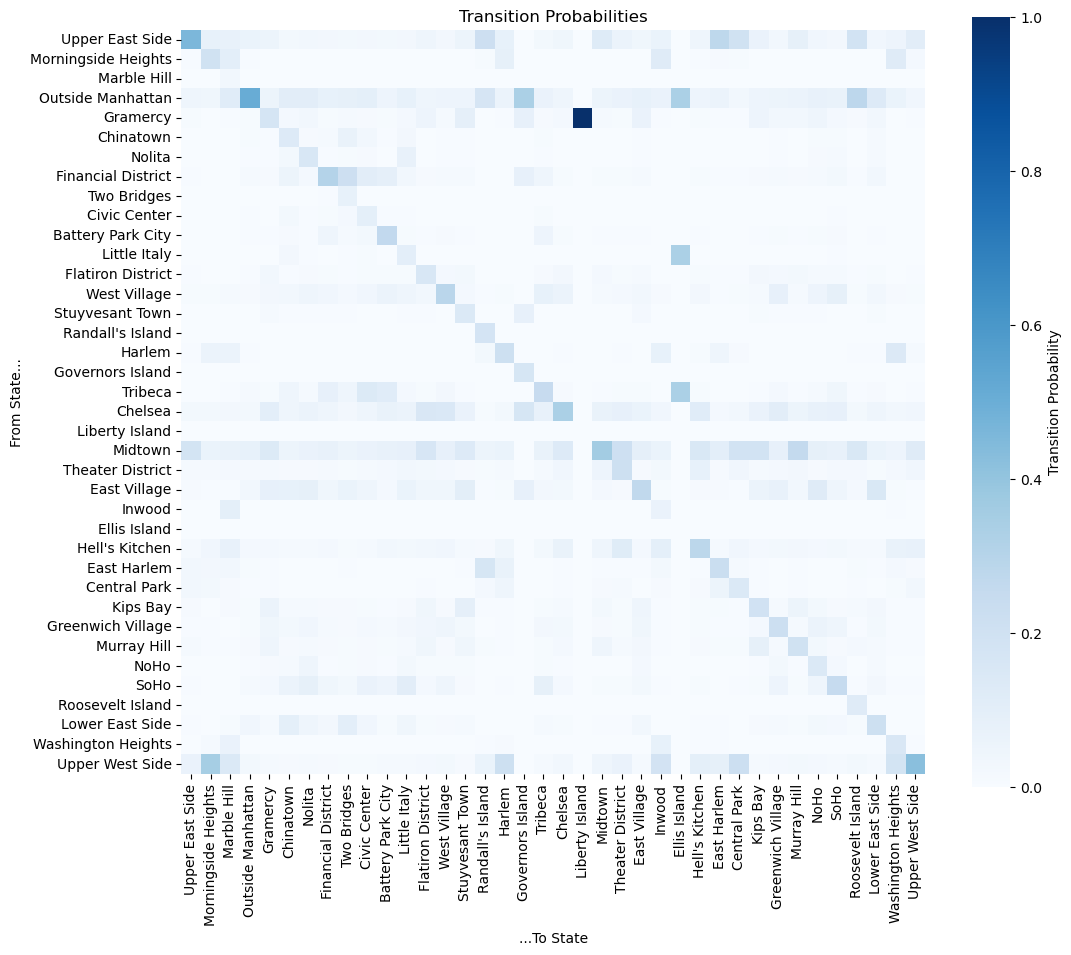

In [43]:
print('Transition Counts:\n', tr_counts)

# Sum the transition counts by row:
sums = tr_counts.sum(axis=0, keepdims=True)
print(f'\nState proportions: \n {sums/np.sum(sums)}')

# Normalize the transition count matrix to get proportions:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [44]:
top_routes = np.dstack(np.unravel_index(np.argsort(-tr_pr.ravel())[:10], tr_pr.shape))[0]
for i, j in top_routes:
    print(f"From {states[j]} to {states[i]}: {tr_pr[i,j]:.3f}")

From Liberty Island to Gramercy: 1.000
From Outside Manhattan to Outside Manhattan: 0.509
From Upper East Side to Upper East Side: 0.459
From Upper West Side to Upper West Side: 0.424
From Midtown to Midtown: 0.361
From Morningside Heights to Upper West Side: 0.349
From Chelsea to Chelsea: 0.335
From Ellis Island to Outside Manhattan: 0.333
From Ellis Island to Little Italy: 0.333
From Governors Island to Outside Manhattan: 0.333


Taxicabs are most likely order 1 because the next neighborhood only depends on the current neighborhood. Drivers usually only choose their nex pickup spot based on where they currently are independent of where they were 2 or 3 trips ago.

In [45]:
start_state = 'Hell\'s Kitchen'
v0 = np.zeros(len(states))
v0[states.index(start_state)] = 1

In [46]:
v2 = np.linalg.matrix_power(tr_pr, 2) @ v0
v3 = np.linalg.matrix_power(tr_pr, 3) @ v0
v5 = np.linalg.matrix_power(tr_pr, 5) @ v0
v10 = np.linalg.matrix_power(tr_pr, 10) @ v0

print(pd.Series(v2, index=states).sort_values(ascending=False)[:5], '\n')
print(pd.Series(v3, index=states).sort_values(ascending=False)[:5], '\n')
print(pd.Series(v5, index=states).sort_values(ascending=False)[:5], '\n')
print(pd.Series(v10, index=states).sort_values(ascending=False)[:5])

Midtown            0.172540
Hell's Kitchen     0.119190
Chelsea            0.108680
Upper West Side    0.098946
Upper East Side    0.086942
dtype: float64 

Midtown              0.172649
Upper East Side      0.107976
Chelsea              0.097194
Upper West Side      0.091567
Outside Manhattan    0.090016
dtype: float64 

Midtown              0.169343
Upper East Side      0.120441
Outside Manhattan    0.099401
Chelsea              0.088059
Upper West Side      0.082561
dtype: float64 

Midtown              0.167838
Upper East Side      0.121963
Outside Manhattan    0.102797
Chelsea              0.086142
Upper West Side      0.078744
dtype: float64


In [47]:
start_state = 'Greenwich Village'
v0 = np.zeros(len(states))
v0[states.index(start_state)] = 1

In [58]:
v = v0.copy()
for _ in range(20):
    v = tr_pr @ v

print(pd.Series(v, index=states).sort_values(ascending=False))

Midtown                1.677462e-01
Upper East Side        1.218350e-01
Outside Manhattan      1.029533e-01
Chelsea                8.615370e-02
Upper West Side        7.853747e-02
Hell's Kitchen         5.331771e-02
East Village           3.870131e-02
Theater District       3.806400e-02
West Village           3.655494e-02
Murray Hill            2.849851e-02
SoHo                   2.397930e-02
Greenwich Village      2.222228e-02
Kips Bay               2.211349e-02
Gramercy               2.185097e-02
Financial District     1.923238e-02
Tribeca                1.779704e-02
Flatiron District      1.721394e-02
Lower East Side        1.613869e-02
Central Park           1.611810e-02
East Harlem            1.379827e-02
Battery Park City      9.983409e-03
Harlem                 9.457252e-03
NoHo                   7.591918e-03
Morningside Heights    7.085497e-03
Stuyvesant Town        4.846592e-03
Nolita                 4.632852e-03
Chinatown              4.610974e-03
Washington Heights     3.158

In the long run, cabs spend most of their time working in Midtown, followed by the Upper East Side, Outside Manhattan, Chelsea, and Upper West Side. This aligns where a lot of the residential/commercial parts of the City are.